<a href="https://colab.research.google.com/github/Chimi-Dendup/CSM301_Statistics-and-Probability-Theory/blob/main/6_Clustering_Models_of_High_Dimensional_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<!DOCTYPE html>
<html >
<body>
<h1 align="center"> <b>6. Clustering: Models of High Dimensional Data</b> </h1>
<h4 align="center"><i>Prepared by Chimi Dendup</i></h4>
</body>
</html>

## **6.1 Overview**

High-dimensional data comes with problems: Data points tend not to be where you think. There is an important rule of thumb for coping with high dimensional data: Use simple models. Clustering is a process of collecting together data points that are close and forming blobs out of them. It is so useful that there is a very wide range of clustering algorithms. The main way to know that the clustering algorithm is good is that the resulting model is useful.

By the end of this section, you should be able to

**Cluster the datasets.**
* Define and describe high dimensional data.
* Define and explain clustering.
* Explain agglomerative and divisive clustering.
* Use Python to cluster agglomerative.
* Use Python to cluster divisively.
* Define and describe vector quantization.
* Build and interpret a dictionary for vector quantization using Python.
* Apply vector quantization in real world application.



## **6.2 High Dimensional Data**

$\underline{Definition:}$

**High dimensional data** refers to a dataset in which the number of features $p$ is larger than the number of observations $N$, often written as $p >> N$.

A dataset with $p = 6$ features and only $N = 3$ observations, for example, would be considered high dimensional data because the number of features is greater than the number of observations.


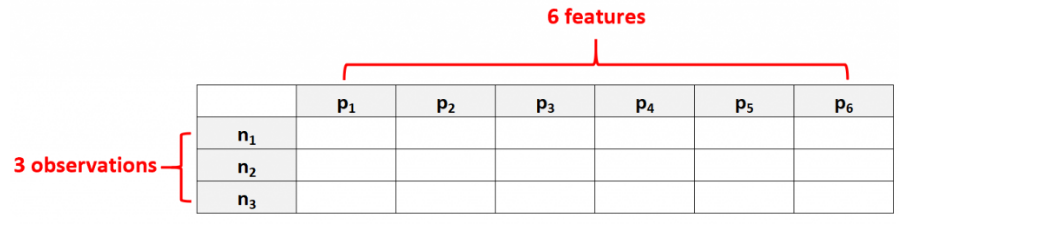

One common misconception is that "high dimensional data" simply refers to a dataset with a large number of features. However, this is incorrect. A dataset may have $10,000$ features, but if it has $100,000$ observations, it is not high dimensional.

### **6.2.1 Why is High Dimensional Data a Problem?**




We will never have a deterministic answer when the number of features in a dataset exceeds the number of observations.

In other words, because we don't have enough observations to train the model on, it becomes impossible to find a model that can describe the relationship between the predictor variables and the response variable.

**Examples of High Dimensional Data**

The following examples illustrate high dimensional datasets in different fields.

**Example 1:** Healthcare Data

In healthcare datasets, where the number of features for a given individual can be massive, high dimensional data is common (i.e. blood pressure, resting heart rate, immune system status, surgery history, height, weight, existing conditions, etc.).

In these datasets, the number of features is frequently greater than the number of observations.

**Example 2:** Financial Data

In financial datasets, where the number of features for a given stock can be quite large, high dimensional data is also common (i.e. PE Ratio, Market Cap, Trading Volume, Dividend Rate, etc.)

The number of features in these datasets is typically much greater than the number of individual stocks.

### **6.2.2 How to Handle High Dimensional Data**

There are two common ways to deal with high dimensional data:

1.   **Choose to include fewer features.**

The most obvious way to avoid dealing with high dimensional data is to simply include fewer features in the dataset.

There are several ways to decide which features to drop from a dataset, including:

* **Drop features with a high number of missing values**: If a given column in a dataset has a high number of missing values, you may be able to remove it entirely without losing much information.

* **Drop low-variance features:** If a given column in a dataset has values that change very little, you may be able to drop it because it is unlikely to provide as much useful information about a response variable as other features.

* **Drop features that have low correlation with the response variable:** If a feature is not highly correlated with the response variable of interest, you can probably remove it from the dataset because it is unlikely to be useful in a model.

2.  **Use a regularization method.**

Another way to handle high dimensional data without dropping features from the dataset is to use a regularization technique such as:

* Principal Components Analysis
* Principal Components Regression
* Ridge Regression
* Lasso Regression

Each of these techniques can be used to effectively deal with high dimensional data. But we're not going to get into that here.




## **6.3 Curse of Dimensionality**

$\underline{Definition:}$

As the number of features or dimensions grows, the amount of data we need to generalize accurately grows exponentially.

**For example**, Say, you dropped a coin on a $100m$ line. How do you find it? Simple, just walk on the line and search. But what if it’s $100 \times 100m^2$ field? It’s already getting tough, trying to search a (roughly) football ground for a single coin. But what if it’s $100 \times 100 \times 100 m^3$ space?! You know, football ground now has thirty-story height. Good luck finding a coin there! That, in essence, is “curse of dimensionality”.

One more **example**, it’s easy to catch a caterpillar moving in a tube($1$ dimension). It’s harder to catch a dog if it were running around on the plane (two dimensions). It’s much harder to hunt birds, which now have an extra dimension they can move in. If we pretend that ghosts are higher-dimensional beings, those are even more difficult to catch.

## **6.4 Clustering Data**

$\underline{Definition:}$

**Clustering** is the process of dividing a population or set of data points into groups so that data points in the same group are more similar to data points in other groups than data points in other groups. In other words, the goal is to separate groups with similar characteristics and assign them to clusters.

There is "too much" space in high-dimensional spaces for any reasonable amount of data to fill (this is what the curse of dimension is about). It is ineffective to divide space into boxes and see how much data is contained in each box: there are too many boxes and not enough data. Instead of breaking up the space, another option is to break up the dataset. We form **clusters**, which are coherent blobs of datapoints that are close to one another. A cluster center is a synthesis of the entire cluster.

Clusters have a variety of uses. For example, chunks of data that
are similar should appear in the same cluster, so cluster centers can be used to build a dictionary of patterns that repeat in a
dataset.

There are two types of clustering:


1.   Hierarchical clustering
2.   Partial Clustering

Here, we will focus only on hierarchical clustering.



### **6.4.1 Hierarchical Clustering**

Hierarchical clustering analysis is a cluster analysis method in data mining and statistics that seeks to build a hierarchy of clusters, i.e. a tree-type structure based on the hierarchy.

Basically, there are two types of hierarchical cluster analysis strategies:

1.   Agglomerative Clustering
2.   Divisive Clustering



#### **6.4.1.1 Agglomerative Clustering**

Bottom-up approach is also known as hierarchical agglomerative clustering (HAC). A more informative structure than the unstructured set of clusters returned by flat clustering. The number of clusters in this clustering algorithm is not predetermined. Bottom-up algorithms start with each data as a singleton cluster and then agglomerate pairs of clusters until all clusters have been merged into a single cluster containing all data.

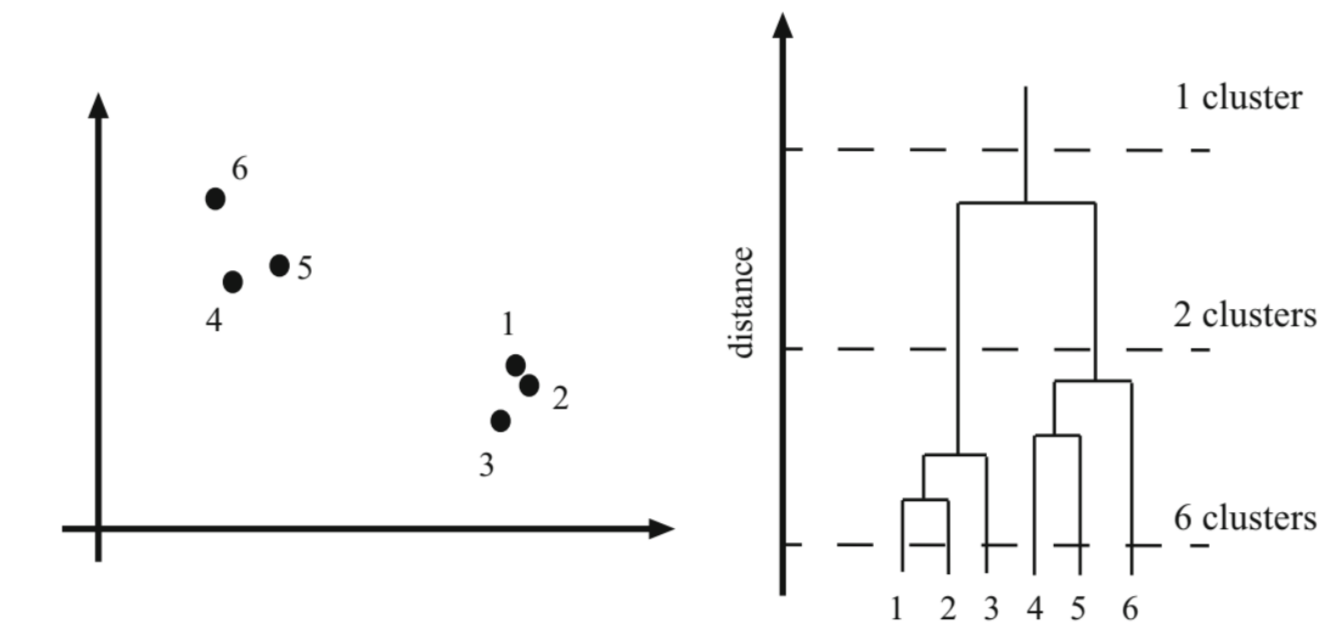

**Left**, a data set; **right**, a dendrogram obtained by agglomerative clustering.

**Algorithm of Agglomerative Clustering**

1. Make each data point as a single-point cluster.
2. Take the two closest distance clusters by single linkage method and make them one clusters.
3. Repeat **step 2** until there is only one cluster.
4. Create a Dendrogram to visualize the history of groupings.
5. Find optimal number of clusters from Dendrogram.

##### **6.4.1.1.1 Mathematical Approach to Agglomerative Clustering**

Let’s take dataset containing Height and Weight of a students. For simplicity we will take only $6$ rows.

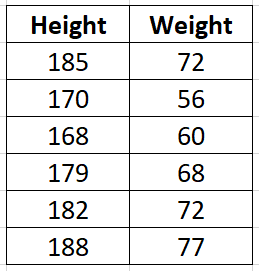

Let’s plot it on graph and visualize better.

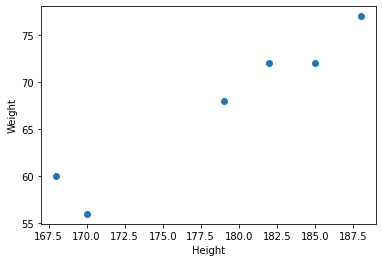

In [ ]:
import matplotlib.pyplot as plt
height = [185,170,168,179,182,188]
weight = [72,56,60,68,72,77]
plt.scatter(height,weight)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

**Step 1:** Make each data point as a single-point cluster.

**Step 2:** Take the two closest distance clusters by single linkage method and make them one clusters.

Before applying the single linkage method to each cluster, we must first determine the distance between them.

Let's use a distance matrix to visualize the distance between each cluster. We will measure the Euclidean distance between two points here.

$P_{00} = P_{11} = P_{22}= P_{33} = P_{44} = P_{55} = 0$

(this is because distance between self is $0$)

Distance between two points $P_{12}$

$$=\sqrt{(P_{1_x}-P_{2_x})^2+(P_{1_y}-P_{2_y})^2}$$
$$= \sqrt{(170–168)^2 + (56–60)^2}$$
$$= \sqrt{ 4 + 16} = \sqrt{20} = 4.47$$

Similarly, we have to calculate the distance between all the clusters and make a distance matrix.

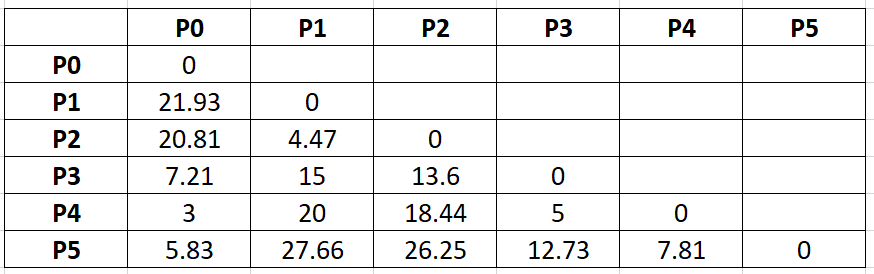

Now we must determine which two clusters have the shortest distance. The distance between $P0$ and $P4$ is $3$. As a result, we must combine these two clusters. We will now merge two clusters using the single linkage method.

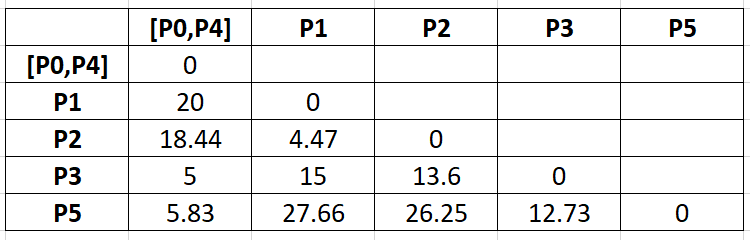

How we have arrive the value of $P_1-[P_0,P_4]$ , $P_2-[P_0,P_4]$,$P_3-[P_0,P_4],P_5-[P_0,P_4]$. We have got these values with the help of single linkage method.

It says that, Distance of $P_1-[P_0,P_4] = d(P_1,[P_0-P_4])$

$$= min(d(P_1,P_0),d(P_1,P_4)) = min( 21.93, 20 ) = 20$$

Distance of $P_2-[P_0,P_4] = d(P_2,[P_0,P_4])$
$$= min(d(P_2,P_0),d(P_2,P_4)) = min( 20.81, 18.44 ) = 18.44$$

Similarly we have calculated all the distances.

**Step 3:** Repeat **step 2**

Again the minimum distance is $P_1-P_2$. So, the next distance matrix will be:

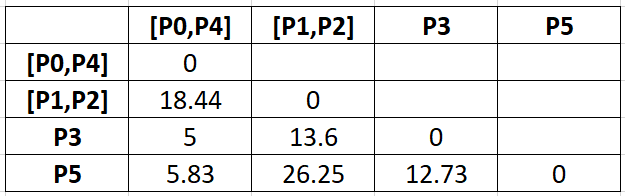

Now minimum distance is $P_3-[P_0,P_4]$ which is $5$. So, the next distance matrix will be:

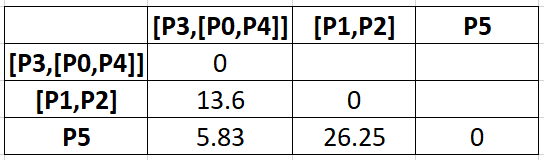

Now minimum distance is $P_5-[P_3,[P_0,P_4]]$ which is $5.83$. So, the next distance matrix will be:

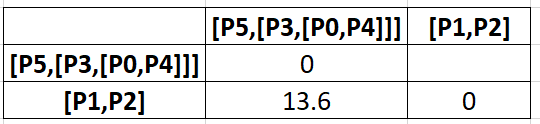

Now there are only two clusters whose distance is $13.6$. So, the final distance matrix will be:

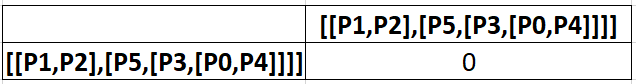

**Step 4:** Create a Dendrogram to visualize the history of groupings.

In [ ]:
import pandas as pd
data=pd.DataFrame({'height':height,'weight':weight})
#data

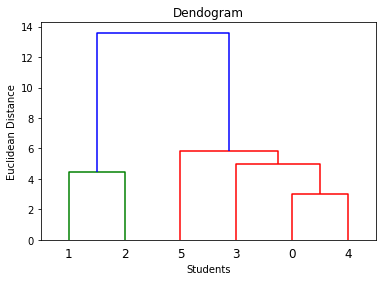

In [ ]:
from scipy.cluster import hierarchy as sch
dendogram = sch.dendrogram(sch.linkage(data,method='single'))
plt.title('Dendogram')
plt.xlabel('Students')
plt.ylabel('Euclidean Distance')
plt.show()

**Step 5:** Find optimal number of clusters from Dendrogram.

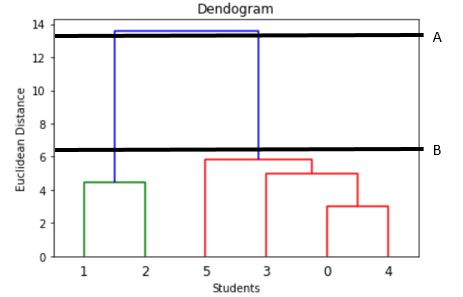

For finding the optimal number of clusters we need to :
1. Determine the largest vertical distance that doesn’t intersect any other cluster.
2. Draw two horizontal lines at both extremes like **A** and **B** in above figure.
3. The optimal number of cluster $=$ number of vertical lines going through the horizontal lines.

Here, from above Dendrogram we can clearly see that there are $2$ vertical lines going through horizontal lines.

Therefore, Optimal number of clusters $= 2$.

##### **6.4.1.1.2 Agglomerative Clustering Example in Python**

A hierarchical clustering method uses either a "top-down" or a "bottom-up" method to cluster observation data. Agglomerative is a hierarchical clustering method that groups elements in a dataset from the bottom up. In this method, each element starts its own cluster and gradually merges with other clusters based on predefined criteria.

A scikit-learn provides the AgglomerativeClustering class to implement the agglomerative clustering method. Here, we'll learn how to cluster data with the AgglomerativeClustering method in Python. The dataset that we will use(Credit Card Dataset) [https://drive.google.com/file/d/1Y1yKCKDZWUknK_kCRFDGh-gUwzDIk6EP/view?usp=sharing]

**Step 1:** We'll start by loading the required modules in Python.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

**Step 2:** Loading and Cleaning the data 

In [ ]:
# Changing the working location to the location of the file
#cd C:\Users\Dev\Desktop\Kaggle\Credit_Card

X = pd.read_csv('CC GENERAL.csv')

# Dropping the CUST_ID column from the data
X = X.drop('CUST_ID', axis = 1)

# Handling the missing values
X.fillna(method ='ffill', inplace = True)

**Step 3:** Preprocessing the data 

In [ ]:
# Scaling the data so that all the features become comparable
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Normalizing the data so that the data approximately
# follows a Gaussian distribution
X_normalized = normalize(X_scaled)

# Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized)


**Step 4:** Reducing the dimensionality of the Data 

In [ ]:
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']


**Dendrograms** are used to divide a given cluster into many different clusters. 

**Step 5:** Visualizing the working of the Dendrograms 

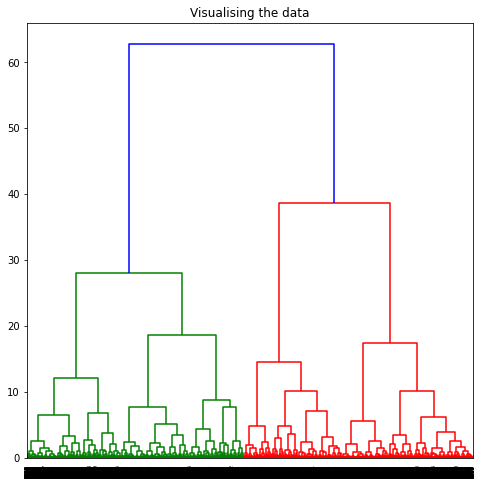

In [ ]:
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward')))

To determine the optimal number of clusters by visualizing the data, imagine all the horizontal lines as being completely horizontal and then after calculating the maximum distance between any two horizontal lines, draw a horizontal line in the maximum distance calculated.  The above image shows that the optimal number of clusters should be $2$ for the given data.

**Step 6:** Building and Visualizing the different clustering models for different values of $k$)

a) $k = 2$ 

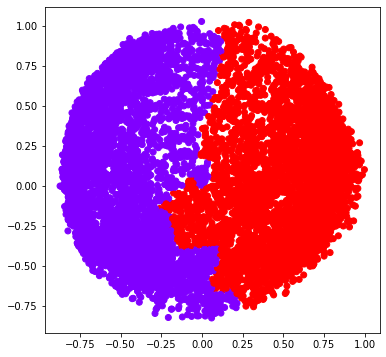

In [ ]:
ac2 = AgglomerativeClustering(n_clusters = 2)

# Visualizing the clustering
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
		c = ac2.fit_predict(X_principal), cmap ='rainbow')
plt.show()


b) $k=3$

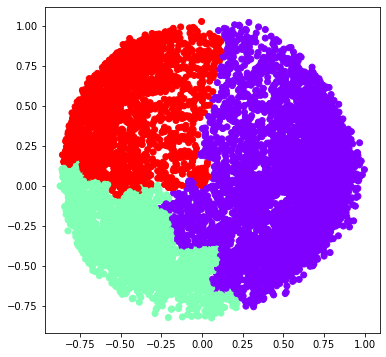

In [ ]:
ac3 = AgglomerativeClustering(n_clusters = 3)

# Visualizing the clustering
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
		c = ac3.fit_predict(X_principal), cmap ='rainbow')
plt.show()

c) $k=4$

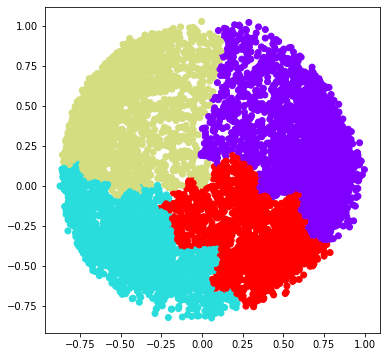

In [ ]:
ac4 = AgglomerativeClustering(n_clusters = 4)

# Visualizing the clustering
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
		c = ac4.fit_predict(X_principal), cmap ='rainbow')
plt.show()

We now determine the optimal number of clusters using a mathematical technique. Here, We will use the Silhouette Scores for the purpose. 

**Step 7:** Evaluating the different models and Visualizing the results. 

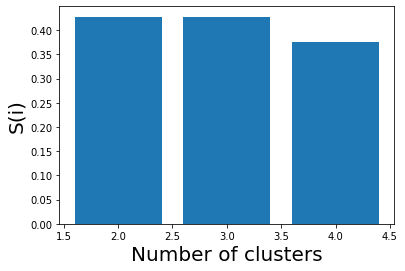

In [ ]:
k = [2, 3, 4]

# Appending the silhouette scores of the different models to the list
silhouette_scores = []
silhouette_scores.append(
		silhouette_score(X_principal, ac2.fit_predict(X_principal)))
silhouette_scores.append(
		silhouette_score(X_principal, ac3.fit_predict(X_principal)))
silhouette_scores.append(
		silhouette_score(X_principal, ac4.fit_predict(X_principal)))
#silhouette_scores.append(
		#silhouette_score(X_principal, ac5.fit_predict(X_principal)))
#silhouette_scores.append(
	#	silhouette_score(X_principal, ac6.fit_predict(X_principal)))

# Plotting a bar graph to compare the results
plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.show()


Thus, with the help of the silhouette scores, it is concluded that the optimal number of clusters for the given data and clustering technique is $2$.

#### **6.4.1.2 Divisive Clustering**

Divisive Clustering is known as top-down approach.

In this approach we take on huge cluster and starts breaking it up into smaller clusters until it reaches individual data points (or single point clusters).

Divisive hierarchical clustering is rarely used in real-world problem solving. It operates in the opposite direction of agglomerative clustering. We begin with all of the data points as a single cluster.

We separate the farthest points or clusters that are not similar at each iteration until each data point is considered an individual cluster. The name divisive clustering refers to the process of dividing single clusters into $n$ clusters.

#### **6.4.1.3 Pros and Cons of Hierarchical Clustering**



1.   We need not to specify the number of clusters required for the algorithm, like K-means clustering.
2.   It doesn’t work well on the large dataset. It is generally applicable to the smaller data. If you have a large dataset, it can become difficult to determine the correct number of clusters by the dendrogram.

3. In comparison to K-means, hierarchical clustering is computationally heavy and takes longer time to run.



### **To Do**

The Iris data contains three classes of Iris flowers in the dependent variable. It also includes four independent variables in *cm*: sepal length, sepal width, petal length, and petal width. Compare the original classes with the classes formed using hierarchical clustering method.

## **6.5 Vector Quantization(VQ)**

**Vector quantization** is used in a variety of applications, including image and voice compression, as well as voice recognition (in general statistical pattern recognition). 

A VQ is nothing more than an approximator. The idea is similar to that of 'rounding off' (say to the nearest integer).

$\underline{Definition:}$ 

A vector quantizer converts $k-$dimensional vectors in the vector space $\mathbb{R}^k$ into a finite set of vectors $Y = \{y_i: i = 1, 2,..., N\}.$ Each vector $y_i$ is referred to as a **code vector** or a **codeword**. A **codebook** is the collection of all the codewords. Each codeword, $y_i$, is associated with a nearest neighbor region known as the **Voronoi region**, which is defined as:

$$V_i = \{x\in \mathbb{R}^k: ||x-y_i||\leq ||x-y_j||, \forall j\neq i\}$$

The set of Voronoi regions divides the entire space $\mathbb{R}^k$ in such a way that: 
$$\bigcup\limits_{i=1}^NV_i=\mathbb{R}^k\\ \bigcap\limits_{i=1}^NV_i = \phi, \forall i\neq j$$

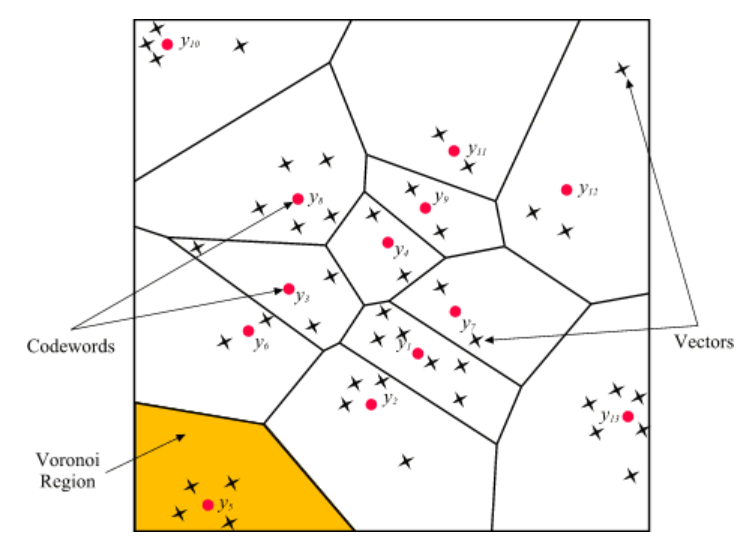

The figure above depicts some vectors in space. The representative codeword is chosen based on its **Euclidean distance** from the input vector. The Euclidean distance is defined as follows:

$$d(x,y_i) = \sqrt{\sum_{j=1}^k(x_j-y_{ij})^2}$$

where $x_j$ represents the $j^{th}$ component of the input vector and $y_{ij}$ represents the $j^{th}$ component of the codeword $y_i$.

An example of a $1-$dimensional VQ is shown below

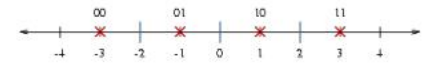

Here, every number less than $-2$ are approximated by $-3$. Every number between $2$ and $0$ are approximated by $-1$..

Note that the approximated values are uniquely represented by $2$ bits. This is a $1-$dimensional, $2-$bit VQ. It has a rate of $2$ bits/dimension.

### **6.5.1 How does VQ work in compression?**

A vector quantizer is made up of two operations. The first is the encoder, and the second is the decoder. The encoder takes an input vector and returns the index of the codeword with the least distortion. In this case, the least distortion is found by calculating the Euclidean distance between the input vector and each codeword in the codebook. When the closest codeword is found, the index of that codeword is sent through a channel (the channel could be a computer storage, communications channel, and so on). When the encoder receives the codeword index, it replaces it with the associated codeword. Figure below depicts a block diagram of the encoder and decoder's operation.

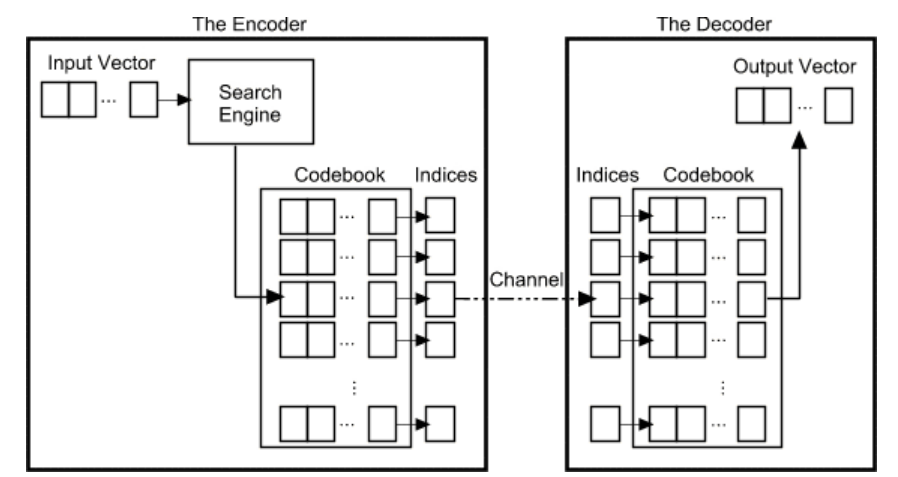

### **6.5.2 Lossy Data Compression Technique with Examples**

**Example 1:** First, we'll look at one-dimensional data with $8$ numbers., i.e., $\{0,1,2,3,4,5,6,7\}$. Now, how many bits are required to represent these $8$ numbers in memory? It requires, 
$$\implies 8 = 2^3\implies 3-bits$$

The question now is how many bits are required to represent $8$ numbers using VQ.

We can represent 

$0$ to $1.9$ by $1$, 

$2$ to $3.9$ by $3$,

 $4$ to $5.9$ by $5$, and
 
$6$ to $7.9$ by $7$.

Thus, we got $4$ numbers to represent $8$ numbers. So, we need $4=2^2\implies 2-bits$ to represent the each number.

Let us take a dataset : $\{5,0,3,5,2\}$. 

Without using VQ, we need $3\times 5 = 15-bits$. 

Using VQ, those datas will be transformed to $\{5,1,3,5,3\}$, we need $2\times 5 = 10-bits$.

The two datasets above doesn't match eachother, thus is called **lossy**.

**Note:** Similary, it works for higher dimensions.



**Example 2:** Compress an emoji

We'll use an emoji as an example to demonstrate how we can use this type of compression to reduce its file size.

The emoji is a $10\times 10$ pixel image:

$$bbbbyybbbb\\bbyyyyyybb\\byyyyyyyyb\\byybyybyyb\\yyyyyyyyyy\\yybyyyybyy\\byybbbbyyb\\byyyyyyyyb\\bbyyyyyybb\\bbbbyybbbb$$

One method of reducing the size of this file is to look at the pixels in $2\times 2$ blocks, work out which colour dominates within each block, and assign that colour to the block:

$$bb~ bb~ yy~ bb~ bb\\
bb~ yy~ yy~ yy~ bb$$

$$by~ yy~ yy~ yy~ yb\\
by~ yb~ yy~ by~ yb$$

$$yy~ yy~ yy~ yy~ yy\\
yy~ by~ yy~ yb~ yy$$

$$by~ yb~ bb~ by~ yb\\
by~ yy~ yy~ yy~ yb$$

$$bb~ yy~ yy~ yy~ bb\\
bb~ bb~ yy~ bb~ bb$$

Starting from the top left-hand corner, the first $2\times 2$ blocks like this:
$$bb\\bb$$

Black dominates here, so we can call this block B.

The next $2\times 2$ block is:
$$bb\\yy$$

Here, neither black nor yellow dominates this block, so we will pick the mid-point between the RGB values of the two colours.
Black is $0, 0, 0$, and yellow is $255, 255, 0$, so the mid-point is $127, 127, 0$. We will call this H.

We do this for all the $2\times 2$ blocks in the $10\times 10$ pixel emoji:

$$bb~ bb~ yy~ bb~ bb\\
bb~ yy~ yy~ yy~ bb$$

$$by~ yy~ yy~ yy~ yb\\
by~ yb~ yy~ by~ yb$$

$$yy~ yy~ yy~ yy~ yy\\
yy~ by~ yy~ yb~ yy$$

$$by~ yb~ bb~ by~ yb\\
by~ yy~ yy~ yy~ yb$$

$$bb~ yy~ yy~ yy~ bb\\
bb~ bb~ yy~ bb~ bb$$

So the compressed file looks like this:
$$BHYHB\\
HYYYH\\
YYYYY\\
HYHYH\\
BHYHB$$

**Image Quality**

This file contains $25$ characters compared to $100$ in the original emoji — a $75\%$ reduction in image file size. But what about the quality of the image?

Translating the compressed file back into an uncompressed image gives us this:
$$bbhhyyhhbb\\
bbhhyyhhbb\\
hhyyyyyyhh\\
hhyyyyyyhh\\
yyyyyyyyyy\\
yyyyyyyyyy\\
hhyyhhyyhh\\
hhyyhhyyhh\\
bbhhyyhhbb\\
bbhhyyhhbb$$

We can now load this newly compressed emoji and compare it to the original:

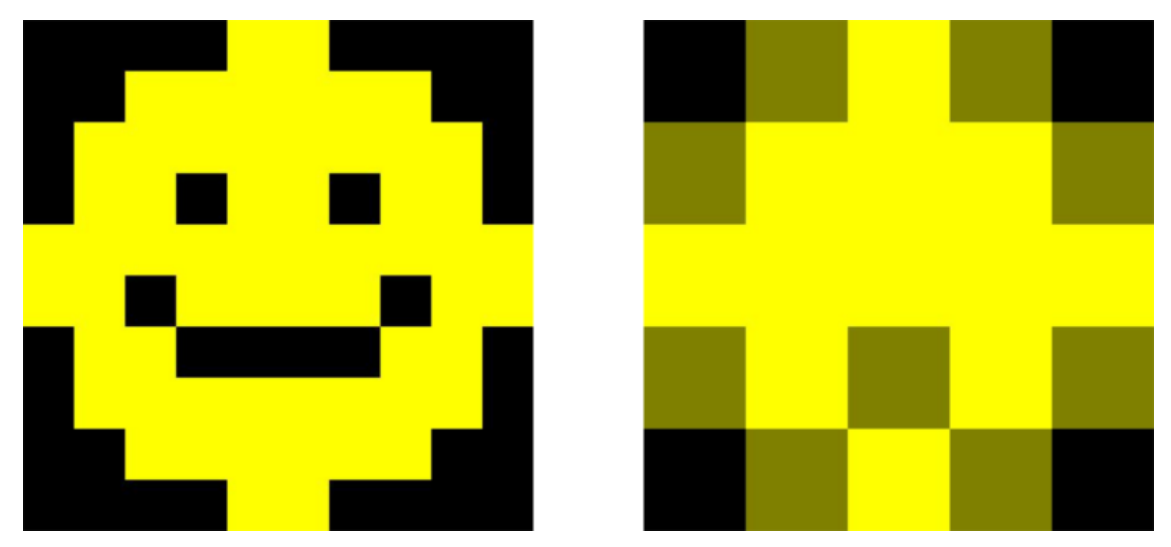

As you can see, in this example the lossy compression has led to a serious reduction in image quality.